In [1]:
#adh implemented with kernel size 16x16

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image = cv2.imread("/home/harish/Documents/Python Scripts/IVP Lab/Assignment4/images.jpeg",0)
image = cv2.resize(image,(64,64))

In [6]:
def adh(image):
    img_len = len(image)
    img_wid = len(image[0])
    
    adh_image = np.zeros((img_len-15,img_wid-15))
    hist = np.zeros((img_len-15,img_wid-15,256))
    
    for i in range(16):
        for j in range(16):
            hist[0,0,image[i,j]] += 1
            
    for i in range(1,img_len-15):
        hist[i,0] = hist[i-1,0]
        for j in range(16):
            hist[i,0,image[i-1,j]] -= 1
            hist[i,0,image[i+15,j]] += 1
            
    for i in range(img_len-15):
        for j in range(1,img_wid-15):
            hist[i,j] = hist[i,j-1]
            for k in range(16):
                hist[i,j,image[i+k,j-1]] -= 1
                hist[i,j,image[i+k,j+15]] += 1
            
    for i in range(img_len-15):
        for j in range(img_wid-15):
            if image[8+i,8+j] <= 128:
                adh_image[i,j] = np.sum(hist[i,j,:image[8+i,8+j]])
            else:
                adh_image[i,j] = 256 - np.sum(hist[i,j,image[8+i,8+j]:])
        
    return adh_image

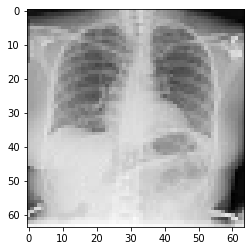

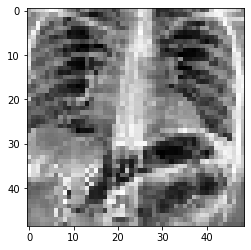

In [7]:
plt.imshow(image, cmap = "gray")
plt.show()
plt.imshow(adh(image), cmap = "gray")
plt.show()